In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

## Rosbank ML Competition

Ссылка на соревнование: https://boosters.pro/champ_15

Росбанк – часть ведущей международной финансовой группы Societe Generale, банк включен ЦБ РФ в число 11 системно значимых кредитных организаций России. Инновации неотъемлемый процесс работы Росбанка, поэтому активно развивается направленный анализа больших данных.

- Данные

Датасет, который содержит историю транзакций клиентов за 3 месяца льготного использования банковского продукта

- Задача

Задача бинарной классификации – прогноз оттока клиентов

Колонка cl_id содержит вутренний id клиента. Для каждого уникальнго cl_id следует предсказать продолжит ли клиент пользоваться продуктом (target_flag). Значение 0 соответствует отказу, а значение 1 соответствует продолжению использования

In [2]:
raw_df = pd.read_csv('rosbank_train.csv')
raw_df.head(5)
# target_sum - можно выкинуть, переменная участвует в другой задаче

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490513 entries, 0 to 490512
Data columns (total 10 columns):
PERIOD          490513 non-null object
cl_id           490513 non-null int64
MCC             490513 non-null int64
channel_type    487603 non-null object
currency        490513 non-null int64
TRDATETIME      490513 non-null object
amount          490513 non-null float64
trx_category    490513 non-null object
target_flag     490513 non-null int64
target_sum      490513 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 37.4+ MB


In [4]:
print("Total clients: ", len(raw_df.cl_id.unique()))

Total clients:  5000


Всего 5000 клиентов, случайным образом возьмем 1000 клиентов для тестирования

In [6]:
cl_ids_test = np.random.choice(raw_df.cl_id.unique(), size=1000, replace=False)
cl_ids_test_set = set(cl_ids_test)

In [7]:
# create transactions dataset for train
transactions_train = raw_df[~raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in train dataset: ", len(transactions_train))
# create transactions dataset for test
transactions_test = raw_df[raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in test dataset: ", len(transactions_test))

Total transactions in train dataset:  391634
Total transactions in test dataset:  98879


## Домашняя работа

1. Наборы данных вида Transactions (несколько транзакций на одного клиента) трансформировать в таблицу, где cl_id будут уникальными (соответственно 4000 строк в train и 1000 строк в test
2. Для каждого cl_id будет уникальное целевое событие target_flag, а также уникальный канал привлечения клиента channel_type (клиент привлекается лишь однажды и с самого начала его записи присваивается значение канала привлечения)
3. При агрегации (*pandas.DataFrame.groupby*) по cl_id (или по связке cl_id, channel_type, target_flag) необходимо создавать производные фичи, идеи для таких фичей могут быть следующими:

    - общая сумма транзакций по каждой из trx_category
    - общая сумма транзакции по основным вылютам (напр. выделить рубли, доллары и евро - предположительно, это будут самые крупные категории)
    - общая сумма транзакций по категориям MCC кодов (например, выбрать основные/популярные MCC коды). ВНИМАНИ! Некоторые MCC коды из train могут быть не представлены в test. Про MCC коды в целом: http://www.banki.ru/wikibank/mcc-kod/; Справочник MCC кодов: https://mcc-codes.ru/code; Про некоторые категории кэшбека Росбанка: https://mcc-codes.ru/card/rosbank-sverkh-plus;
    - возможные агрегации по времени суток и дням недели - траты в выходные (праздники) или будни, в ночное время или в рабочее и т.д.
4. **Обязательная часть**: провести первичный анализ данных - посмотреть распределения признаков, выделить самые популярные MCC, помотреть активность клиентов по дням недели/времени, какие категории транзакции (trx_category) наиболее популярны и т.д. Получить инсайты, которые в дальнейшем помогут вам правильно подготовить фичи
5. **Дополнительная часть**: с отобранными фичами и полученными компонентами обучить модель (тип алгоритма на свой вкус, можно начать с линейной) и померить качество на локальном тестовом наборе данных (локальная валидация), который создается в этом ноутбуке. **Метрика оценки качества - ROC AUC**(https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
6. Задания принимаются в виде ноутбука с кодов/картинками выполненной обязательной части

При возникновении вопросов и для отправки домашнего задания - egsachko@gmail.com или http://fb.com/sachkoe
    

## Практика

In [8]:
raw_df.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [9]:
raw_df_grouped = raw_df[
    ['cl_id', 'amount', 'MCC']
].groupby(['cl_id', 'MCC']).agg(['sum', 'count'])

# aggregated_dataset = raw_df_grouped.unstack().fillna(0)
aggregated_dataset = raw_df_grouped.unstack()

In [10]:
aggregated_dataset

amount                                                ...              \
         sum                                                ...  count        
MCC     742  763  780    1520 1711 1731 1750 1799 2741 2842 ...   8699 8911   
cl_id                                                       ...               
0        NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
1        NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
5        NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
9        NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
11       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
14       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
20       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
21       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
22       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
23       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
24       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
25       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
28       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
29       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
31       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
32       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
35       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
38       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
39       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
41       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
42       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
46       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
48       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
49       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
50       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
52       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
54       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
55       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
56       NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
...      ...  ...  ...    ...  ...  ...  ...  ...  ...  ... ...    ...  ...   
10162    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10163    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10164    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10166    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10167    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10168    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10169    NaN  NaN  NaN  640.0  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10170    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10171    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10175    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10176    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10177    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10180    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10181    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10184    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10185    NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  

In [11]:
def transaction_by_day_count(dataset):
    dataset['day_of_transaction'] = dataset['TRDATETIME'].apply(
        lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%w')
    ) 
    tmp_df = dataset.groupby(
        ['cl_id','day_of_transaction']
    )['day_of_transaction'].size().unstack().fillna(0).reset_index()
    old_columns = [
        old_col for old_col in tmp_df.columns.tolist()
        if old_col in dataset['day_of_transaction'].unique()
    ]
    tmp_df.rename(
        columns={old_col: 'day_' + old_col for old_col in old_columns},
        inplace=True
    )
    return tmp_df
    
    

def transaction_by_hour_count(dataset):
    dataset['hour_of_transaction'] = dataset['TRDATETIME'].apply(
        lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%H')
    ) 
    return dataset.groupby(
        ['cl_id','hour_of_transaction']
    )['hour_of_transaction'].size().unstack().fillna(0).reset_index()

# transaction_by_day_count(raw_df)

### Агрегирование с помощью Pandas и обучение базовой модели

In [12]:
def get_aggregated_df(df, agg_type, col_to_groupby):
    agg_df = df[['cl_id', col_to_groupby, 'amount']].groupby(['cl_id', col_to_groupby]).agg([agg_type])
    agg_df = agg_df.unstack(fill_value=0)
    agg_df.columns = agg_df.columns.get_level_values(2)

    old_name = agg_df.columns.name
    old_cols = agg_df.columns
    new_cols = [old_name + '_' + agg_type + '_' + str(old_col) for old_col in old_cols]
    agg_df.rename(
        columns={old_col: new_col for old_col, new_col in zip(old_cols, new_cols)}, inplace=True
    )
    return agg_df

In [13]:
grouped_df = transactions_train[['cl_id', 'MCC', 'amount']].groupby(['cl_id', 'MCC']).agg(['sum'])

In [14]:
grouped_df.head(10)

amount
                 sum
cl_id MCC           
0     5200   5023.00
      5411   2031.00
      5921    767.00
      6011  20000.00
      6012  36562.00
1     4111     17.10
      4468     34.00
      5200     23.90
      5411  14629.46
      5499    492.80

In [15]:
grouped_df.unstack(fill_value=0)

amount                                              ...                  \
         sum                                              ...                   
MCC     742  763  780  1520 1711 1731 1750 1799 2741 2842 ...  8699 8911 8931   
cl_id                                                     ...                   
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
9        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
11       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
22       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
23       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
24       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
28       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
29       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
31       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
32       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
39       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
41       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
42       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
46       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
48       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
49       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
50       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
52       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
54       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
55       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
56       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
58       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
59       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
61       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
63       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
69       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
73       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...  ...  ...   
10150    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10152    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10154    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10155    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10159    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10161    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10164    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10166    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10167    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10168    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10170    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10171    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10175    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10176    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10177    0.0  0.0  0.0  0.0  0.0  0.0

In [16]:
df_train_mcc = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='MCC'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='MCC'),
    left_index=True,
    right_index=True,
)

In [17]:
transactions_train.shape

(391634, 10)

In [18]:
df_train_mcc.shape

(4000, 670)

In [19]:
len(transactions_train.MCC.unique())*2

670

In [20]:
transactions_train.trx_category.value_counts()

POS               332269
DEPOSIT            17042
WD_ATM_ROS         15365
WD_ATM_PARTNER      7734
C2C_IN              6003
WD_ATM_OTHER        5669
C2C_OUT             4373
BACK_TRX            2183
CAT                  974
CASH_ADV              22
Name: trx_category, dtype: int64

In [21]:
df_train_trx_category = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='trx_category'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='trx_category'),
    left_index=True,
    right_index=True,
)

In [22]:
df_train_mcc = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='MCC'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='MCC'),
    left_index=True,
    right_index=True,
)

df_train_trx_category = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='trx_category'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='trx_category'),
    left_index=True,
    right_index=True,
)

df_train = pd.merge(
    df_train_mcc,
    df_train_trx_category,
    left_index=True,
    right_index=True,
)

In [23]:
df_train.head()

,MCC_mean_742,MCC_mean_763,MCC_mean_780,MCC_mean_1520,MCC_mean_1711,MCC_mean_1731,MCC_mean_1750,MCC_mean_1799,MCC_mean_2741,MCC_mean_2842,...,trx_category_sum_BACK_TRX,trx_category_sum_C2C_IN,trx_category_sum_C2C_OUT,trx_category_sum_CASH_ADV,trx_category_sum_CAT,trx_category_sum_DEPOSIT,trx_category_sum_POS,trx_category_sum_WD_ATM_OTHER,trx_category_sum_WD_ATM_PARTNER,trx_category_sum_WD_ATM_ROS
cl_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36562.00,0.0,0.00,20000.0,7821.00,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.00,95000.0,122578.04,0.0,0.0,50000.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13990.0,0.0,33878.38,0.0,0.00,130000.0,290500.75,5500.0,6000.0,66500.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,296950.0,0.00,0.0,0.00,5000.0,12365.09,0.0,100000.0,435000.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10000.0,21692.90,0.0,37694.98,426300.0,200956.11,0.0,5400.0,422300.0


In [24]:
df_targets = raw_df[['cl_id', 'target_flag']].drop_duplicates().copy()
df_targets.index = df_targets['cl_id']
df_targets = df_targets.drop('cl_id', axis=1)
df_targets.head()

,target_flag
cl_id,
0,0
1,0
5,1
9,0
10,0


In [25]:
df_train = pd.merge(
    df_train,
    df_targets,
    left_index=True,
    right_index=True,
    how='inner'
)

In [27]:
df_train.shape

(4000, 691)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression()
X_train = df_train.drop(['target_flag'], axis=1)
y_train = df_train['target_flag']

In [30]:
clf.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve

In [32]:
y_train_predict = clf.predict_proba(X_train)[:, 1]


roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)

Train:  0.77


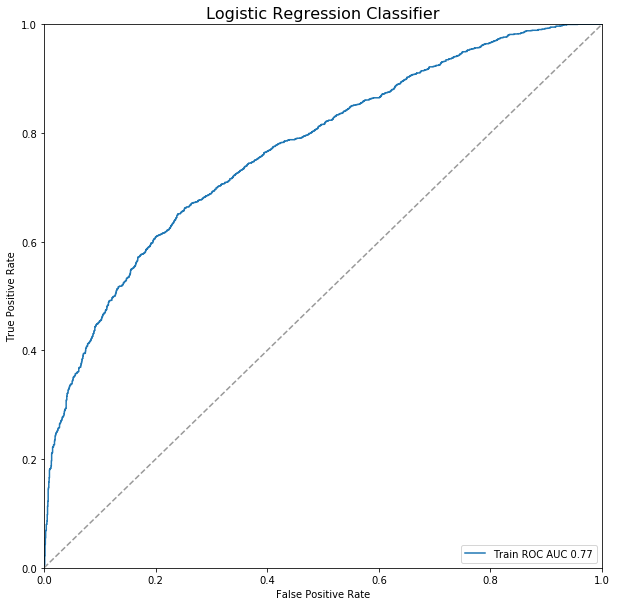

In [69]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

## Пример загрузки описаний MCC кодов

In [33]:
from bs4 import BeautifulSoup as bs
# import requests
import urllib
from urllib.request import urlopen, Request

In [35]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3'
}
reg_url = 'https://mcc-codes.ru/code'
req = Request(url=reg_url, headers=headers)

In [36]:
check = bs(urlopen(req).read())

/Users/olgamonahova/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/olgamonahova/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [37]:
check.find('body')

<body>
<script type="text/javascript">
            (function(m,e,t,r,i,k,a){m[i]=m[i]||function(){(m[i].a=m[i].a||[]).push(arguments)};
            m[i].l=1*new Date();k=e.createElement(t),a=e.getElementsByTagName(t)[0],k.async=1,k.src=r,a.parentNode.insertBefore(k,a)})
            (window, document, "script", "https://mc.yandex.ru/metrika/tag.js", "ym");
            ym(43622234, "init", {
                id:43622234, clickmap:true, trackLinks:true, accurateTrackBounce:true, webvisor:true
            });
            window.yaParams = {'User': 'Guest'};
                        ym(43622234, 'params', window.yaParams||{});
        </script>
<noscript><div><img alt="" src="https://mc.yandex.ru/watch/43622234" style="position:absolute; left:-9999px;"/></div></noscript>
<header id="layout-header">
<nav class="navbar navbar-fixed-top navbar-expand-lg navbar-dark bg-dark navbar-autohide" id="layout-nav">
<div class="container">
<div class="navbar-header">
<button class="navbar-toggler d-print-

In [39]:
check.find_all('tr')[-1]

<tr data-mcc="9999">
<td><a href="https://mcc-codes.ru/code/9999"><b>9999</b></a></td>
<td><b>Категория неизвестна</b></td>
<td></td>
<td class="d-print-none">16.07.18</td>
</tr>

In [40]:
list_of_mcc_tags = check.find_all('tr')[1:]

In [41]:
list_of_mcc_tags[0].text.split('\n')

['', '0742', 'Ветеринарные услуги', 'Контрактные услуги', '31.01.18', '']

In [102]:
mcc_names_list = list(
    map(
        lambda x: (x.text.split('\n')[1], x.text.split('\n')[2]), list_of_mcc_tags
    )
)

In [177]:
df_mcc_list = pd.DataFrame(mcc_names_list)

In [103]:
transactions_train.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [104]:
transactions_test.currency.value_counts()

810    96115
978     1259
840      322
933      163
764      130
826      101
392       77
985       69
410       68
949       66
981       65
203       65
784       59
578       49
980       46
975       26
752       26
348       24
51        22
398       20
756       18
191       14
986       12
156       12
214        8
704        8
376        6
208        5
901        5
643        5
352        3
702        2
32         2
462        2
608        2
944        2
504        1
Name: currency, dtype: int64

In [46]:
import requests

In [63]:
# спарсим курс валют

class Rate:
    def __init__(self, format='value'):
        self.format = format
    
    def exchange_rates(self):
        """
        Возвращает ответ сервиса с информацией о валютах в виде:
        
        {
            'AMD': {
                'CharCode': 'AMD',
                'ID': 'R01060',
                'Name': 'Армянских драмов',
                'Nominal': 100,
                'NumCode': '051',
                'Previous': 14.103,
                'Value': 14.0879
                },
            ...
        }
        """
        r = requests.get('https://www.cbr-xml-daily.ru/daily_json.js')
        return r.json()['Valute']

In [74]:
r = Rate()

In [75]:
rates = r.exchange_rates()

In [76]:
currency_list = list(
    map(
        lambda x: (rates[x]['NumCode'], rates[x]['Name'], rates[x]['Value']/rates[x]['Nominal']), rates
    )
)

In [77]:
df_currency = pd.DataFrame(currency_list)

In [79]:
df_currency.columns = ['numcode','currency_name','rate']

In [80]:
# не хватало российского рубля
df_currency = df_currency.append({'numcode':'810', 'currency_name':'Российский рубль', 'rate':'1'}, ignore_index=True)

In [83]:
df_currency.numcode = df_currency.numcode.astype(int)
df_currency.index = df_currency.numcode

In [87]:
df_currency = df_currency.drop('numcode', axis = 1)

In [88]:
df_currency.head()

,currency_name,rate
numcode,,
36,Австралийский доллар,47.2801
944,Азербайджанский манат,39.3188
826,Фунт стерлингов Соединенного королевства,85.3816
51,Армянских драмов,0.136759
933,Белорусский рубль,30.762


In [89]:
raw_df['currency_rate']=raw_df.currency.map(df_currency.rate)

In [90]:
raw_df.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum,currency_rate
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0,1
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0,1
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0,1
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0,1
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0,1


In [92]:
# проверим, все ли нашлось по кодам
# да :)

raw_df.currency_rate.value_counts()

1                       477644
75.2492                   5536
66.7044                   1921
30.762                     561
17.3583                    423
2.9202500000000002         399
12.6191                    390
38.4397                    297
85.3816                    267
2.44818                    209
0.604837                   197
0.236118                   151
66.2736                    126
0.059022599999999995       110
7.68165                    110
7.15214                    109
49.069                     100
0.176523                    99
9.83855                     70
0.136759                    60
50.1085                     41
0.934399                    40
0.955924                    35
3.8997                      35
8.499970000000001           34
39.3188                     31
47.2801                     17
17.9154                     12
10.0794                     12
15.8627                      4
4.70312                      2
Name: currency_rate, dtype: int64

In [97]:
raw_df.currency_rate = raw_df.currency_rate.astype(float)

In [98]:
raw_df['amount_rub'] = raw_df['amount']*raw_df['currency_rate']

In [109]:
# Ура, теперь можно складывать все суммы затрат,т.к. они приведены к одной валюте
raw_df.head(11)

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum,currency_rate,amount_rub
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0,1.0000,5023.00000
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0,1.0000,20000.00000
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0,1.0000,767.00000
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0,1.0000,2031.00000
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0,1.0000,36562.00000
5,01/10/2017,1,5814,NaN,810,16OCT17:00:00:00,380.0,POS,0,0.0,1.0000,380.00000
6,01/10/2017,1,5814,NaN,810,10OCT17:00:00:00,378.0,POS,0,0.0,1.0000,378.00000
7,01/10/2017,1,5814,NaN,810,16OCT17:00:00:00,199.0,POS,0,0.0,1.0000,199.00000
8,01/10/2017,1,5814,NaN,810,11OCT17:00:00:00,400.0,POS,0,0.0,1.0000,400.00000
9,01/07/2017,1,5411,NaN,810,26JUL17:00:00:00,598.0,POS,0,0.0,1.0000,598.00000


In [111]:
#create transactions dataset for train
transactions_train = raw_df[~raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in train dataset: ", len(transactions_train))
# create transactions dataset for test
transactions_test = raw_df[raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in test dataset: ", len(transactions_test))

Total transactions in train dataset:  391634
Total transactions in test dataset:  98879


In [112]:
raw_df_grouped = raw_df[
    ['cl_id', 'amount_rub', 'MCC']
].groupby(['cl_id', 'MCC']).agg(['sum', 'count'])

# aggregated_dataset = raw_df_grouped.unstack().fillna(0)
aggregated_dataset = raw_df_grouped.unstack()

In [113]:
def get_aggregated_df(df, agg_type, col_to_groupby):
    agg_df = df[['cl_id', col_to_groupby, 'amount_rub']].groupby(['cl_id', col_to_groupby]).agg([agg_type])
    agg_df = agg_df.unstack(fill_value=0)
    agg_df.columns = agg_df.columns.get_level_values(2)

    old_name = agg_df.columns.name
    old_cols = agg_df.columns
    new_cols = [old_name + '_' + agg_type + '_' + str(old_col) for old_col in old_cols]
    agg_df.rename(
        columns={old_col: new_col for old_col, new_col in zip(old_cols, new_cols)}, inplace=True
    )
    return agg_df

In [115]:
df_train_mcc.head()

MCC,MCC_mean_742,MCC_mean_763,MCC_mean_780,MCC_mean_1520,MCC_mean_1711,MCC_mean_1731,MCC_mean_1750,MCC_mean_1799,MCC_mean_2741,MCC_mean_2842,...,MCC_sum_8699,MCC_sum_8911,MCC_sum_8931,MCC_sum_8999,MCC_sum_9211,MCC_sum_9222,MCC_sum_9311,MCC_sum_9399,MCC_sum_9402,MCC_sum_9405
cl_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,210.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3825.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train_mcc = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='MCC'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='MCC'),
    left_index=True,
    right_index=True,
)

df_train_trx_category = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='trx_category'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='trx_category'),
    left_index=True,
    right_index=True,
)

df_train = pd.merge(
    df_train_mcc,
    df_train_trx_category,
    left_index=True,
    right_index=True,
)

In [134]:
# пора добавить группировку по дням недели и времени

def transaction_by_day_count(dataset):
    dataset['day_of_transaction'] = dataset['TRDATETIME'].apply(
        lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%w')
    ) 
    tmp_df = dataset.groupby(
        ['cl_id','day_of_transaction']
    )['day_of_transaction'].size().unstack().fillna(0).reset_index()
    old_columns = [
        old_col for old_col in tmp_df.columns.tolist()
        if old_col in dataset['day_of_transaction'].unique()
    ]
    tmp_df.rename(
        columns={old_col: 'day_' + old_col for old_col in old_columns},
        inplace=True
    )
    return tmp_df
    
    

def transaction_by_hour_count(dataset):
    dataset['hour_of_transaction'] = dataset['TRDATETIME'].apply(
        lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%H')
    ) 
    
    tmp_df = dataset.groupby(
        ['cl_id','hour_of_transaction']
    )['hour_of_transaction'].size().unstack().fillna(0).reset_index()
    old_columns = [
        old_col for old_col in tmp_df.columns.tolist()
        if old_col in dataset['hour_of_transaction'].unique()
    ]
    tmp_df.rename(
        columns={old_col: 'hour_' + old_col for old_col in old_columns},
        inplace=True
    )
    return tmp_df

# transaction_by_day_count(raw_df)

In [120]:
df_trans_day = transaction_by_day_count(transactions_train)

In [135]:
df_trans_hour = transaction_by_hour_count(transactions_train)

In [136]:
df_trans_day.index = df_trans_day.cl_id
df_trans_day.drop('cl_id', axis = 1)

day_of_transaction,day_0,day_1,day_2,day_3,day_4,day_5,day_6
cl_id,,,,,,,
0,0.0,0.0,2.0,0.0,1.0,0.0,2.0
1,7.0,20.0,20.0,16.0,16.0,10.0,15.0
5,15.0,19.0,19.0,15.0,25.0,24.0,25.0
9,5.0,8.0,7.0,5.0,6.0,4.0,4.0
10,74.0,35.0,62.0,68.0,65.0,57.0,102.0
11,28.0,29.0,30.0,25.0,40.0,40.0,25.0
22,15.0,6.0,0.0,1.0,12.0,11.0,14.0
23,3.0,8.0,11.0,9.0,6.0,10.0,4.0
24,0.0,3.0,3.0,1.0,0.0,4.0,0.0


In [137]:
# добавились hours в имени столбцов, чтобы было понятно к чему это относится

df_trans_hour.index = df_trans_hour.cl_id
df_trans_hour.drop('cl_id', axis = 1)

hour_of_transaction,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
cl_id,,,,,,,,,,,,,,,,,,,,,
0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
5,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0
9,7.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,3.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0
10,299.0,3.0,6.0,8.0,14.0,9.0,19.0,17.0,13.0,12.0,...,6.0,3.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0
11,207.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0
22,39.0,0.0,3.0,3.0,0.0,1.0,3.0,3.0,0.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,36.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0
24,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
df_train_time = pd.merge(
    df_trans_day,
    df_trans_hour,
    left_index=True,
    right_index=True,
)

In [139]:
df_train_time.head()

,cl_id_x,day_0,day_1,day_2,day_3,day_4,day_5,day_6,cl_id_y,hour_00,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
cl_id,,,,,,,,,,,,,,,,,,,,,
0,0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7.0,20.0,20.0,16.0,16.0,10.0,15.0,1,101.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
5,5,15.0,19.0,19.0,15.0,25.0,24.0,25.0,5,124.0,...,1.0,1.0,1.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0
9,9,5.0,8.0,7.0,5.0,6.0,4.0,4.0,9,7.0,...,0.0,3.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0
10,10,74.0,35.0,62.0,68.0,65.0,57.0,102.0,10,299.0,...,6.0,3.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0


In [141]:
df_train_time = df_train_time.drop('cl_id_x', axis = 1)

In [142]:
# соберем все вместе
df_train = pd.merge(
    df_train,
    df_train_time,
    left_index=True,
    right_index=True,
)

In [169]:
df_train.shape

(4000, 724)

In [164]:
# сперва добавились стобцы с часами 00, 01 и.т.д, потом переделала на красиво - hour_00, hour_01 ...
#df_train.drop(df_train.columns[-56:-32], axis=1, inplace=True)

In [170]:
df_train.head()

,MCC_mean_742,MCC_mean_763,MCC_mean_780,MCC_mean_1520,MCC_mean_1711,MCC_mean_1731,MCC_mean_1750,MCC_mean_1799,MCC_mean_2741,MCC_mean_2842,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
cl_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,3.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0


In [171]:
transactions_train.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum,currency_rate,amount_rub,day_of_transaction,hour_of_transaction
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0,1.0,5023.0,6,00
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0,1.0,20000.0,4,12
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0,1.0,767.0,2,00
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0,1.0,2031.0,6,00
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0,1.0,36562.0,2,13


In [172]:
# можно приступать к первичному анализу

In [183]:
top_MCC = pd.DataFrame(transactions_train.MCC.value_counts().head(100))

In [188]:
df_mcc_list.index = df_mcc_list[0].astype('int')

In [190]:
df_mcc_list.drop(0, axis = 1, inplace=True)

In [192]:
df_mcc_list.head()

,1
0,
742,Ветеринарные услуги
763,Сельскохозяйственные кооперативы
780,Услуги садоводства и ландшафтного дизайна
1520,Генеральные подрядчики – жилое и коммерческое ...
1711,"Генеральные подрядчики по вентиляции, теплосна..."


In [216]:
df_TOP_MCC_count = pd.merge(
    top_MCC,
    df_mcc_list,
    left_index=True,
    right_index= True
)

In [230]:
df_TOP_MCC_count.head(30)

,MCC,1
5411,96788,"Бакалейные магазины, супермаркеты"
6011,43348,Финансовые учреждения – снятие наличности авто...
5814,33140,Фастфуд
5812,24267,"Места общественного питания, рестораны"
5499,21846,Различные продовольственные магазины - нигде б...
5541,15762,"Станции техобслуживания, с дополнительными усл..."
5912,14811,Аптеки
5999,10323,Различные магазины и специальные розничные маг...
6012,8189,Финансовые учреждения – торговля и услуги
5921,6817,Магазины с продажей спиртных напитков навынос


In [199]:
raw_df_grouped = raw_df[
    ['amount_rub', 'MCC']
].groupby(['MCC']).agg(['sum', 'count'])

In [222]:
raw_df_grouped.head()

amount_rub      
               sum count
MCC                     
742   149099.80750    63
763    22352.15548    13
780     7514.50000     5
1520  514859.33000    14
1711  265628.86000    30

In [232]:
TOP_MCC_amount = pd.DataFrame(raw_df_grouped.sort_values(by=raw_df_grouped.columns[0], ascending = False).head(100))

In [233]:
TOP_MCC_amount.columns = TOP_MCC_amount.columns.droplevel()

In [234]:
df_TOP_MCC_amount = pd.merge(
    TOP_MCC_amount,
    df_mcc_list,
    left_index=True,
    right_index= True
)

In [239]:
df_TOP_MCC_amount.head(10)

,sum,count,1
6011,1.473988e+09,54260,Финансовые учреждения – снятие наличности авто...
6012,1.845139e+08,10025,Финансовые учреждения – торговля и услуги
5411,1.309069e+08,121427,"Бакалейные магазины, супермаркеты"
4829,8.975536e+07,6205,Денежные переводы
5812,3.400496e+07,29847,"Места общественного питания, рестораны"
5712,3.118500e+07,2414,"Оборудование, мебель и бытовые принадлежности ..."
5211,3.063628e+07,6262,Лесо- и строительный материал
5732,2.980945e+07,3263,Продажа электронного оборудования
4511,2.864345e+07,1624,"Авиалинии, авиакомпании - нигде более не класс..."
5722,2.847188e+07,2667,Бытовое оборудование


In [242]:
df_train.describe()

,MCC_mean_742,MCC_mean_763,MCC_mean_780,MCC_mean_1520,MCC_mean_1711,MCC_mean_1731,MCC_mean_1750,MCC_mean_1799,MCC_mean_2741,MCC_mean_2842,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,20.324251,0.454850,1.503625,49.265667,29.758531,1.242125,23.441750,11.703228,0.111598,0.40225,...,0.887250,0.829000,0.769250,0.770000,0.747500,0.549500,0.365750,0.259250,0.167250,0.097750
std,319.755786,24.907046,59.884083,1817.306118,824.958545,75.940746,708.326777,384.785780,5.276567,20.59319,...,1.690489,1.709383,1.555027,1.654474,1.899775,1.462048,1.112334,0.915832,0.684394,0.459617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9933.333333,1564.500000,3405.500000,74666.666667,40000.000000,4800.000000,30290.000000,14145.500000,320.500000,1275.00000,...,21.000000,38.000000,17.000000,27.000000,41.000000,22.000000,20.000000,16.000000,13.000000,7.000000


In [245]:
df_cl_id = transactions_train[
    ['cl_id', 'target_flag']
].groupby(['cl_id']).agg(['mean'])

In [ ]:
df_cl_id.columns = df_cl_id.columns.droplevel(1)

In [255]:
df_train = pd.merge(
df_train,
df_cl_id,
left_index=True,
right_index= True
)

In [288]:
df_train = df_train.rename(columns = {('target_flag', 'mean'):'target_flag'})

In [289]:
df_train.head()

,MCC_mean_742,MCC_mean_763,MCC_mean_780,MCC_mean_1520,MCC_mean_1711,MCC_mean_1731,MCC_mean_1750,MCC_mean_1799,MCC_mean_2741,MCC_mean_2842,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,target_flag
cl_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0,1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0,0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [316]:
trx = transactions_train[['trx_category','amount_rub']].groupby(['trx_category']).agg(['sum','count'])
trx.sort_values(by=trx.columns[0], ascending = False)

amount_rub        
                         sum   count
trx_category                        
POS             6.994775e+08  331231
WD_ATM_ROS      5.463825e+08   15364
DEPOSIT         3.901716e+08   17042
WD_ATM_PARTNER  2.599554e+08    7734
C2C_IN          8.094961e+07    5977
C2C_OUT         7.050982e+07    4373
WD_ATM_OTHER    3.980974e+07    5577
BACK_TRX        1.899480e+07    2180
CAT             1.867323e+07     974
CASH_ADV        8.804590e+05      21

In [318]:
day = transactions_train[['day_of_transaction','amount_rub']].groupby(['day_of_transaction']).agg(['sum','count'])
day.sort_values(by=day.columns[0], ascending = False)

amount_rub       
                             sum  count
day_of_transaction                     
5                   3.756282e+08  63102
4                   3.472615e+08  56705
3                   3.254913e+08  55518
2                   3.250510e+08  54505
1                   3.203237e+08  52452
6                   2.498795e+08  58820
0                   1.821696e+08  49371

In [324]:
day.columns = day.columns.droplevel()

In [349]:
day.columns = ['amount_sum','amount_count']
day['amount_sum']

day_of_transaction
0    1.821696e+08
1    3.203237e+08
2    3.250510e+08
3    3.254913e+08
4    3.472615e+08
5    3.756282e+08
6    2.498795e+08
Name: amount_sum, dtype: float64

In [334]:
def barplot(x_data, y_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
   
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

In [363]:
week = ['Sun','Mon', 'Tue', 'Wen', 'Thu', 'Fri', 'Sat']

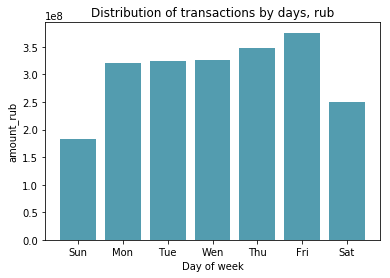

In [364]:
# основные крупные траты происходят в будние дни
barplot(week, day['amount_sum'], 'Day of week', 'amount_rub', 'Distribution of transactions by days, rub')

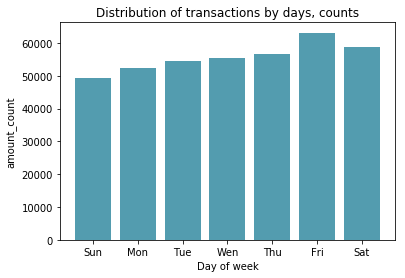

In [365]:
# на выходных колиство транзакций почти без изменений, но средняя сумма значительно ниже, т.к. проседает сумма
barplot(week, day['amount_count'], 'Day of week', 'amount_count', 'Distribution of transactions by days, counts')

In [359]:
hour = transactions_train[['hour_of_transaction','amount_rub']].groupby(['hour_of_transaction']).agg(['sum','count'])
hour.columns = hour.columns.droplevel()
hour.columns = ['amount_sum','amount_count']

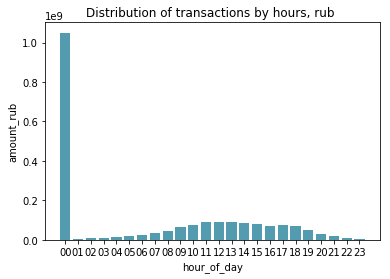

In [360]:
# есть подозрение, что большая часть транзакций - это автоматическое списание денежных средств с карты, т.к. пик приходится на период с 0 до 1 часу ночи
barplot(hour.index, hour['amount_sum'], 'hour_of_day', 'amount_rub', 'Distribution of transactions by hours, rub ')

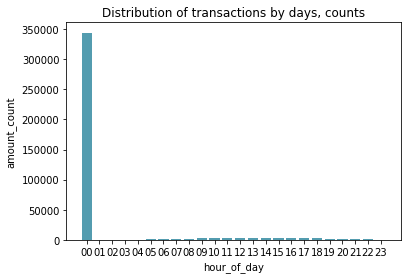

In [361]:
barplot(hour.index, hour['amount_count'], 'hour_of_day', 'amount_count', 'Distribution of transactions by days, counts')

In [369]:
# для интереса добавим средний чек
df_TOP_MCC_amount['avg_transaction']=df_TOP_MCC_amount['sum']/df_TOP_MCC_amount['count']

In [370]:
df_TOP_MCC_amount

,sum,count,1,avg_transaction
6011,1.473988e+09,54260,Финансовые учреждения – снятие наличности авто...,27165.274915
6012,1.845139e+08,10025,Финансовые учреждения – торговля и услуги,18405.372412
5411,1.309069e+08,121427,"Бакалейные магазины, супермаркеты",1078.070733
4829,8.975536e+07,6205,Денежные переводы,14465.005484
5812,3.400496e+07,29847,"Места общественного питания, рестораны",1139.309177
5712,3.118500e+07,2414,"Оборудование, мебель и бытовые принадлежности ...",12918.393308
5211,3.063628e+07,6262,Лесо- и строительный материал,4892.411076
5732,2.980945e+07,3263,Продажа электронного оборудования,9135.594776
4511,2.864345e+07,1624,"Авиалинии, авиакомпании - нигде более не класс...",17637.594251
5722,2.847188e+07,2667,Бытовое оборудование,10675.619083


In [371]:
clf = LogisticRegression()
X_train = df_train.drop(['target_flag'], axis=1)
y_train = df_train['target_flag']

In [372]:
clf.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [373]:
y_train_predict = clf.predict_proba(X_train)[:, 1]


roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)

Train:  0.8


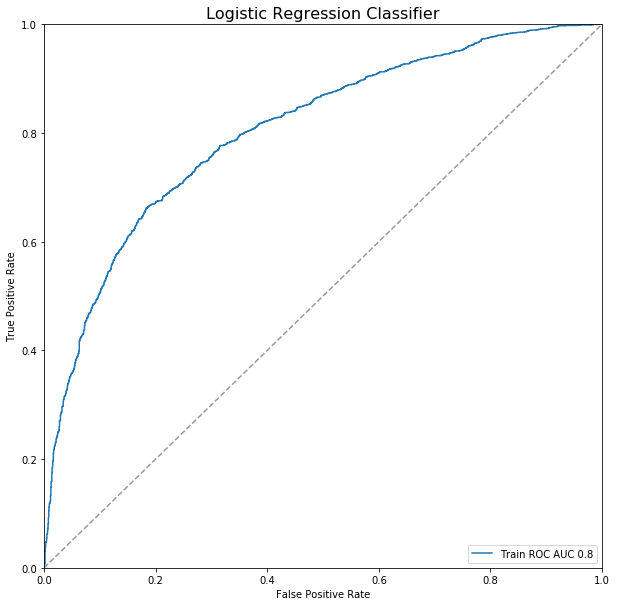

In [374]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()